In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df= pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['class labels(out)', 'Alcohol(IN)', 'Malic Acid(IN)']

In [5]:
df

,class labels(out),Alcohol(IN),Malic Acid(IN)
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


# lets plot KDE plot for this kernel Density Estimation plot for the probablity density

<Axes: xlabel='Alcohol(IN)', ylabel='Density'>

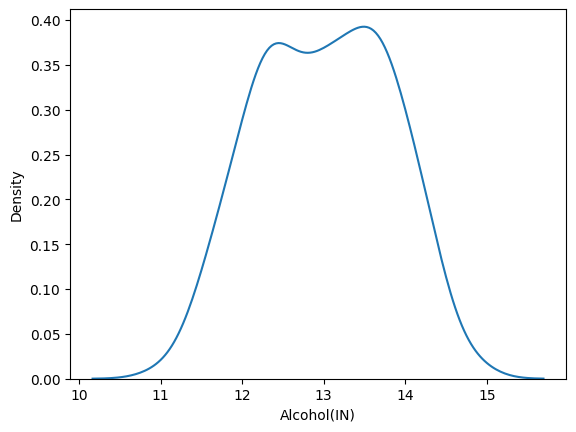

In [7]:
sns.kdeplot(df['Alcohol(IN)'])

<Axes: xlabel='Malic Acid(IN)', ylabel='Density'>

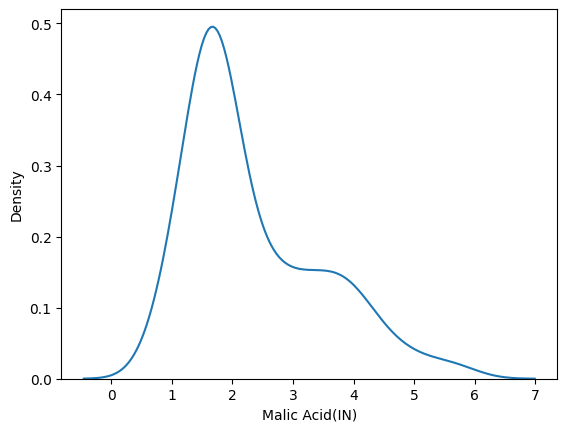

In [9]:
# lets visualize the malic acid
sns.kdeplot(df['Malic Acid(IN)'],)

# visualizing the scatter plot for this:

<Axes: xlabel='Alcohol(IN)', ylabel='Malic Acid(IN)'>

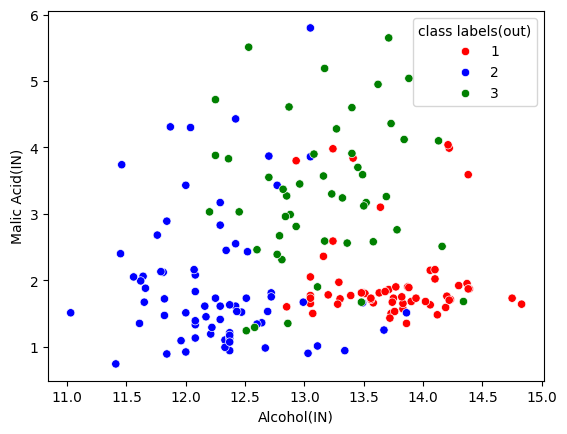

In [11]:
color_dict={1:'red', 2:'blue', 3:'green'}
sns.scatterplot(x=df['Alcohol(IN)'],y=df['Malic Acid(IN)'], hue = df['class labels(out)'], palette=color_dict)

# So asusual we will do the train test split for before doing the scaling this time normalization.


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('class labels(out)', axis = 1), df['class labels(out)'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

# Now we will apply the normalization using the MinMax Scaler

In [18]:
# we will import the liberary form scikit learn.
from sklearn.preprocessing import MinMaxScaler
# we will create a object
scaler = MinMaxScaler()
# training it on the data
scaler.fit(X_train)
# what would i have learned in this min value and maximum value.
# using this we will transform the other values
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# when we use scikit learn it converts dataframe into numpy array which is bit complex to observe and understand therefor we will convert back into dataframe.

In [20]:
X_train_scaled= pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [21]:
# now lets check and see it
np.round(X_train_scaled.describe(), 1)

,Alcohol(IN),Malic Acid(IN)
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


# Lets compare those plots together here

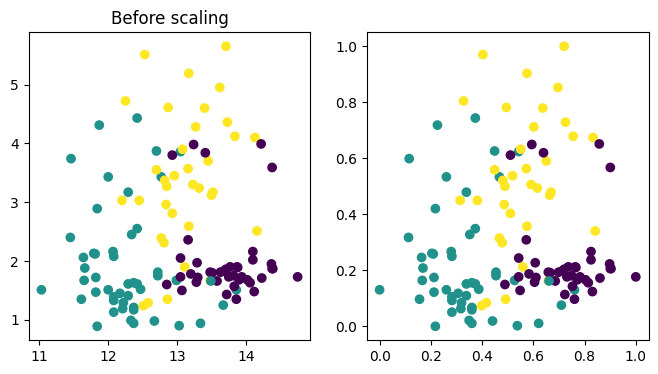

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

ax1.scatter(X_train['Alcohol(IN)'], X_train['Malic Acid(IN)'], c=y_train)
ax1.set_title('Before scaling')
ax2.scatter(X_train_scaled['Alcohol(IN)'], X_train_scaled['Malic Acid(IN)'], c=y_train)
plt.show()